#### 로지스틱 회귀
```
공부한 시간 데이터를 통해 합격여부 예측
공부시간에 비례해서 점수를 부여
공부 1시간에 10점 부유
--> 선형 방정식
합격점수(z) = w*(공부시간) + b
w(가중치) : 중요도 / 1시간당 점수 (10점)
b(편향) : 기본점수(-50, 5시간은 공부해야 0점)

문제점 : 합격점수에 해당하는 100점이 나올 수도 있지만 -200점이 나올수도 있음
분류를 하려면 합격/불합격 판단 / 방정식의 값으로 확률을 계산 (0~100%)
```
#### 점수를 확률로 바꾸기 (시그모이드 함수) 0 ~ 1 사이의 값으로 변경
```
합격확률 = 시그모이드(z) = 1 / 1 + e^-z
합격점수가 높으면 1에 가깝고 낮으면 0에 가깝다.
합격점수가 0이면 정확히 0.5(50%) --> 임계값
```
#### 비용함수 : 모델이 얼마나 틀렸는지 측정. 로지스틱은 로그함수를 사용
```
합격(정답 = 1)
모델이 99% 합격예측 --> 벌점은 거의 0점
모델이 1% 합격예측 --> 벌점은 무한대로 발산
불합격(정답 = 0)
모델이 1%로 합격 예측 --> 벌점은 거의 0점
모델이 99%로 합격 얘측 --> 벌점은 무한대로 발산

log loss 원리
w, b를 찾음 -> 손실함수를 이용해서 비용이 가장 낮을 때
```
#### 비용이 최저인 값을 찾아나가는 과정 : 경사하강법

#### 너무 완벽한 모델 (학습에 대해서)
```
규제(Regularizarion) 모델이 너무 복잡해지지 않도록 페널티 또는 단순함에 대한 보너스
L2규제(Ridge) : w(중요도) 값이 너무 커지는 것을 막는다.

L1규제(Lasso) : 어떤 특징이 별로 중요하지 않을 때. w(중요도)를 0으로 만들어 불필요한 특징을 제거하는 효과
가중치들의 절댓값의 합을 페널티로 추가 --> feature selector 역할도 겸함
```



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train, y_train)
predict = clr.predict(X_test)
print(predict[:5], y_test[:5])
predict_proba = clr.predict_proba(X_test)
predict_proba[:5]
# 0일 확률 0.005, 1일 확률 0.994




[1 0 1 0 1] [1 0 1 0 1]


array([[5.54685218e-03, 9.94453148e-01],
       [9.72178660e-01, 2.78213402e-02],
       [3.30505742e-04, 9.99669494e-01],
       [9.99997926e-01, 2.07445942e-06],
       [2.81653942e-01, 7.18346058e-01]])

In [18]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")


In [ ]:
# 과적합을 임의로 만들어서 시각화
# 1. 규제 알고리즘을 적용
# 2. 모델을 경량화. 모델의 복잡도를 높이는 요소를 제거
# 3. 추가 데이터를 투입해서 학습

In [ ]:
# 과적합 모델
X_small, y_small = make_moons(n_samples = 50, noise=0.25, random_state=45)

# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias = False)
X_poly_small = poly.fit_transform(X_small)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled_small = scaler.fit_transform(X_poly_small)

# 모델 훈련(약한 규제, c:1000)
log_reg_overfit = LogisticRegression(C=1000, max_iter = 10000)#c:규제강도(클수록 약한 규제), max_iter(학습 횟수)
log_reg_overfit.fit(X_scaled_small, y_small)

# 강한 규제 적용( c :0.1 )
log_reg_regulation = LogisticRegression(C=0.1, max_iter = 1000)
log_reg_regulation.fit(X_scaled_small, y_small)
# 데이터 추가(500개)
# 약한 규제
X_large, y_large = make_moons(n_samples = 500, noise=0.25, random_state=45)

# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias = False)
X_poly_large = poly.fit_transform(X_large)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled_large = scaler.fit_transform(X_poly_large)

# 모델 훈련(데이터 500개, 약한 규제 c:1000)
log_reg_moredata = LogisticRegression(C=1000, max_iter = 10000)#c:규제강도(클수록 약한 규제), max_iter(학습 횟수)
log_reg_moredata.fit(X_scaled_large, y_large)


LogisticRegression(C=1000, max_iter=10000)

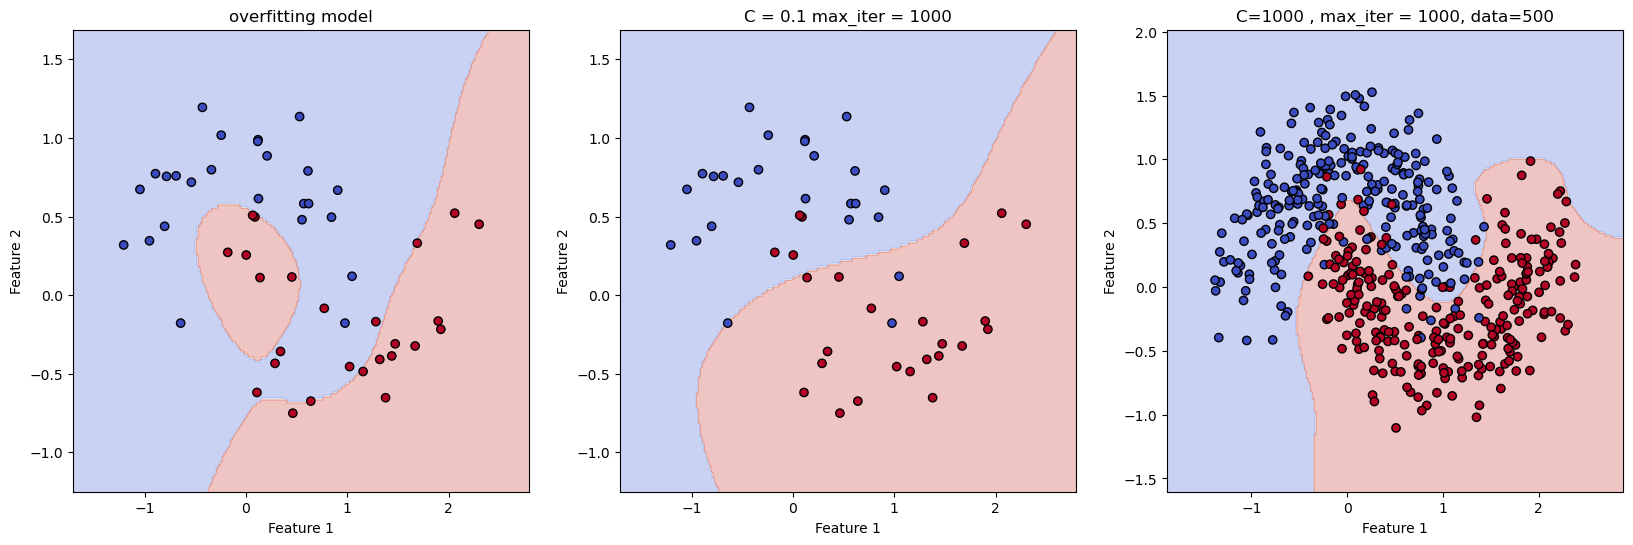

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
plot_decision_boundary(log_reg_overfit, X_small, y_small, poly, scaler, 'overfitting model', axes[0])
plot_decision_boundary(log_reg_regulation, X_small, y_small, poly, scaler, 'C = 0.1 max_iter = 1000', axes[1])
plot_decision_boundary(log_reg_moredata,X_large, y_large, poly, scaler, "C=1000 , max_iter = 1000, data=500", axes[2])


In [ ]:
# 파이프라인 구현

#### ROC, AUC
```
정확도 99%이지만 데이터가 불균형이라면 좋지 않은 척도 ROC, AUC : 얼마나 안정적으로 좋은 성능을 내는 지 종합적으로 시각화
모델이 예측한 확률을 기반으로 분류기준점(Threshold)을 계속 변경해서 모델의 성능이 어떻게 변화하는지 하나의 곡선으로 시각화
```

#### ROC 구성요소 TPR FPR
```
혼동행렬 (P : 1  N : 0)  P : 암환자 N : 정상  --> PN은 무엇으로 예측했는 지, TF는 예측이 맞았는 지
TP(True Positive) : 진짜 암인 환자를 암이라고 예측 (정답)
FN(False Negative) : 진짜 암인 환자를 정상이라고 예측 (오답)
FP(False Positive) : 정상인을 암이라고 예측 (오답)
TN(True Negative) : 정산인을 정상이라고 예측 (정답)

ROC 곡선의 x축과 y축
y축 : 진짜를 얼마나 찾았나  TPR(True Positive Ratio) 실제 양성인 데이터 중에서 모델이 양성으로 올바르게 예측한 비율
TRP : 민감도 또는 재현율
실제로 암인데 암이라고 예측 / 실제 모든 암 환자수
TP / TP + FN

x축 : 가짜를 얼마나 잘못 찾았나.. FPR
FPR = FP(정상인데 암이라고 예측) / FP + TN(실제 모든 정상인수)
```

#### AUC (Area Under The Curve)
```
ROC 곡선 아래의 면적
1 : 완벽한 모델 ROC가 좌측상단에 붙어 있는 모양
0.5 : 무작위로 찍는 것과 같음. 랜덤하게 예측하는 수준의 ROC. 대각선 직선
< 0.5 : 예측을 반대로 한 잘못된 모델
```

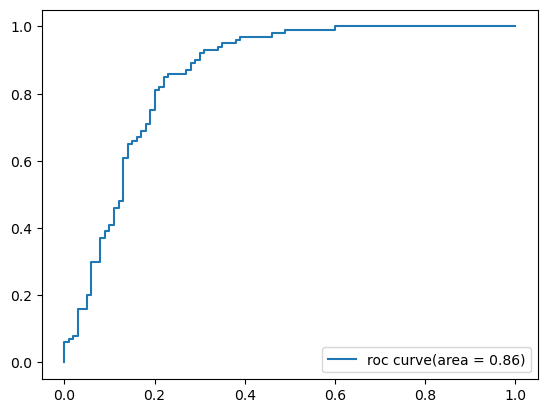

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                    n_redundant=0,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]  # 양성클래스의 확률

# ROC  AUC
# 실제값과 예측 확률을 사용 FPR  TPR
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_proba)
# fpr tpr 이용 auc를 계산
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test, model.predict(X_test))  )

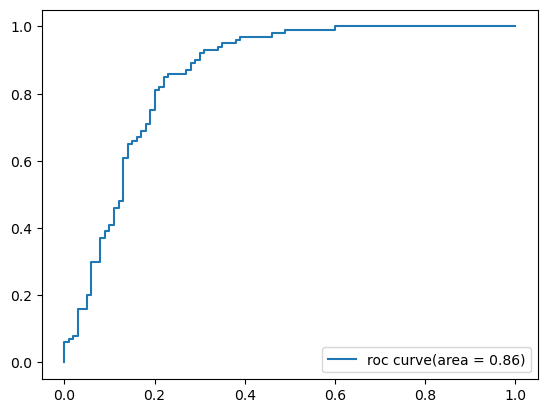

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                    n_redundant=0,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]  # 양성클래스의 확률

# ROC  AUC
# 실제값과 예측 확률을 사용 FPR  TPR
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_proba)
# fpr tpr 이용 auc를 계산
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test, model.predict(X_test))  )

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import(
    train_test_split, cross_val_score, StratifiedKFold,
    learning_curve, validation_curve, GridSearchCV, RandomizedSearchCV,
    cross_validate
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# 여러번 반복해서 불안정성 확인
holdout_scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, stratify= y)
    pipe.fit(X_train, y_train)
    holdout_score = pipe.score(X_test, y_test)
    holdout_scores.append(holdout_score)
    # 처음 3개만 출력
    if i<3:
        print(f'{i+1} : {holdout_score : .4f}')
print('---')
print(f'홀드아웃 평균 : {np.mean(holdout_scores) : .4f} 표준편차 : {np.std(holdout_scores) : .4f}')
print(f'min : {np.min(holdout_scores)} max : {np.max(holdout_scores)}')

1 :  0.9580
2 :  0.9650
3 :  0.9720
---
홀드아웃 평균 :  0.9755 표준편차 :  0.0095
min : 0.958041958041958 max : 0.993006993006993
